In [156]:
import os
import tensorflow as tf

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, Embedding, Bidirectional
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [157]:
# i wanna predict time series of stock prices with LSTM and graph knowledge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [158]:
data_path: str = "../datasets/currency/price_dollar_rl.json"

In [159]:
import time, datetime

In [160]:
import json


def read_data(path: str) -> pd.DataFrame:
    with open(path, "r") as f:
        data = json.loads(f.read())
    data = data["data"]
    dataset = []
    for i in data:
        dataset.append(
            [
                int(i[0].replace(",", "", i[0].count(","))),
                int(i[1].replace(",", "", i[1].count(","))),
                int(i[2].replace(",", "", i[2].count(","))),
                int(i[3].replace(",", "", i[3].count(","))),
                datetime.datetime.strptime(i[6], "%Y/%m/%d").timestamp(),
            ]
        )
    return pd.DataFrame(dataset, columns=["open", "low", "high", "close", "date"])

In [161]:
df = read_data(data_path)

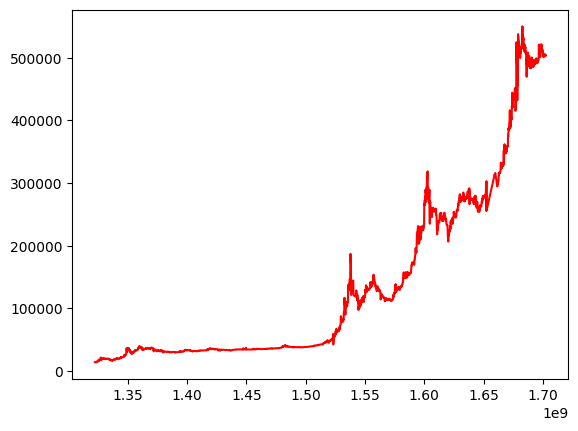

In [162]:
# i wanna plot a plot that if the price is going up or down the color of the plot will change

plt.plot(df["date"], df["close"], "r-")

In [163]:
# i wanna predict the price of the next day
# so i will use the close price as the label
# and the open, low, high, date as the features
# i use time series data to predict the next day price

# model = Sequential()
# model.add(Dense(4, input_dim=4, activation='relu'))
# model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer='adam', loss='mean_squared_error')

In [164]:
# model.fit(df[['open', 'low', 'high', 'date']], df['close'], epochs=100, batch_size=10)

In [165]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [166]:
# Function to create sequences of data for time series forecasting
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


# Define sequence length
seq_length = 10

# Create sequences for training and testing data
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [167]:
# Build the LSTM model
model = Sequential(
    [
        LSTM(
            units=50,
            activation="relu",
            return_sequences=True,
            input_shape=(seq_length, 5),
        ),
        Dropout(0.2),
        LSTM(units=50, activation="relu", return_sequences=False),
        Dropout(0.2),
        Dense(units=1),
    ]
)

/home/black/pyenvs/tf/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [168]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mean_squared_error")

In [169]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - loss: 0.0568
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0217
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0207
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0204
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0206
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200
Epoch 15/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203
Epoch 16/50
93/93 ━━━━━━━━━━

In [170]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0035
Test Loss: 0.0033461409620940685


In [171]:
# Make predictions
predictions = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step 


In [172]:
print(predictions.shape, y_test.shape)

(735, 1) (735, 5)


In [173]:
y_test

array([[3.66939926e-02, 3.69997201e-02, 3.62747810e-02, 3.61344851e-02,
        2.05171173e-01],
       [3.65819499e-02, 3.74475231e-02, 3.66067312e-02, 3.65626629e-02,
        2.04943952e-01],
       [3.57042819e-02, 3.66078925e-02, 3.62747810e-02, 3.64509643e-02,
        2.04716731e-01],
       ...,
       [0.00000000e+00, 9.32922847e-04, 0.00000000e+00, 0.00000000e+00,
        4.54442172e-04],
       [1.68064088e-04, 1.10084896e-03, 1.65975104e-04, 1.67547844e-04,
        2.27221086e-04],
       [6.53582566e-04, 1.58596884e-03, 6.45458737e-04, 6.51574950e-04,
        0.00000000e+00]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Dollar Price for 2012-10-17 : 56662.64791488648


TypeError: unsupported operand type(s) for -: 'float' and 'DateOffset'

In [181]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


def preprocess_data(df):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[["open", "low", "high", "close"]])

    # Combine normalized features with time
    df_scaled = pd.DataFrame(scaled_data, columns=["open", "low", "high", "close"])
    df_scaled["date"] = df["date"]

    return df_scaled, scaler


def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=1))
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model


def fit_model(df):
    # Preprocess data
    df_scaled, scaler = preprocess_data(df)

    # Reshape data for LSTM
    X = []
    y = []
    for i in range(60, len(df_scaled)):
        X.append(df_scaled.iloc[i - 60 : i, 0:4].values)
        y.append(df_scaled.iloc[i, 3])

    X_train, y_train = np.array(X), np.array(y)

    # Create and fit the model
    model = create_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=10, batch_size=32)

    return model, scaler


def predict_price(model, df, date):
    # Get the last 60 days of data
    last_60_days = df[-60:].values

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    last_60_days_scaled = scaler.fit_transform(last_60_days)

    # Reshape data for LSTM
    X_test = []
    X_test.append(last_60_days_scaled)
    X_test = np.array(X_test)

    # Predict the next day's price
    predicted_price_scaled = model.predict(X_test)

    # Inverse scaling to get the actual price
    predicted_price = scaler.inverse_transform(
        [[0, 0, 0, predicted_price_scaled[0, 0]]]
    )

    return predicted_price[0, 3]


# Example usage:
# Assuming you have a DataFrame named 'df' containing the required columns: open, low, high, close, time
# Also, 'date' is the timestamp for the day you want to predict

# Fit the model
model, scaler = fit_model(df)

# Predict the price for the next day

Epoch 1/10


/home/black/pyenvs/tf/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0201
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8965e-04
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7767e-04
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5044e-04
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4049e-04
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4983e-04
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4250e-04
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5252e-04
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2716e-04
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4614e-04


In [188]:
model

<Sequential name=sequential_10, built=True>

In [193]:
def predict_price(model, df, date):
    # Get the last 60 days of data
    last_60_days = df[-60:]

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    last_60_days_scaled = scaler.fit_transform(last_60_days.reshape(-1, 1))

    # Reshape data for LSTM
    X_test = np.array(last_60_days_scaled).reshape(1, 60, df.shape[1])

    # Predict the next day's price
    predicted_price_scaled = model.predict(X_test)

    # Inverse scaling to get the actual price
    predicted_price = scaler.inverse_transform(predicted_price_scaled)

    return predicted_price[0][0]

In [194]:
import pandas as pd
import numpy as np

# # Create a sample DataFrame
# date_range = pd.date_range(start='2023-01-01', end='2023-03-01')
# df_sample = pd.DataFrame({
#     'open': np.random.rand(len(date_range)),
#     'low': np.random.rand(len(date_range)),
#     'high': np.random.rand(len(date_range)),
#     'close': np.random.rand(len(date_range)),
# }, index=date_range)

# Create a sample model (you need to replace this with your actual trained model)
sample_model = None  # Replace None with your trained model

# Choose a date for prediction
prediction_date = "2023-03-02"

# Predict the price for the chosen date
predicted_price = predict_price(model, data, prediction_date)
print("Predicted price for", prediction_date, ":", predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted price for 2023-03-02 : 0.0018255252


In [199]:
def inverse_normalize_price(predicted_price, scaler):
    # Reshape the predicted price to match the expected input for inverse_transform
    predicted_price = np.array([[predicted_price[0], 0, 0, 0]])  # reshape to (1,4)
    # Inverse transform the predicted price
    actual_price = scaler.inverse_transform(predicted_price)
    # Extract the actual price from the array
    return actual_price[0][0]

IndexError: invalid index to scalar variable.

In [1]:
# save X_train, y_train, X_test, y_test in csv files
for i, data in enumerate([X_train, y_train, X_test, y_test]):
    np.savetxt(f"../datasets/currency/price_dollar_rl_{i}.csv", data, delimiter=",")

NameError: name 'X_train' is not defined